# Modeldescription, IS-LM

We have decided to consider an IS-LM model describing the interaction between the goods and money market. It illustrates how the economy reaches equilibrium in the short run when considering both real and monetary factors. It consists of 2 curves, the IS- and LM-curve.

**IS curve (Investment-Savings):** defines the equilibrium on the goods market, given the interest rate and income level.
$$
Y = C(Y - T) + I(r) + G
$$

where *Y* is the income level, *T* is the tax level, *G* is government spending, *C* is private consumption, and *I(r)* is investment, which depends endogenously on the interest rate, *r*, in percent. We assume *C* and *I(r)* to follow these forms:

$$
\begin{aligned}
C &= a + b \cdot (Y - T) \\
I(r) &= c - d \cdot r
\end{aligned}
$$
where *a*, *b*, *c* and *d* are exogenous parameters.

**LM curve (Liquidity Preference-Money Supply):** defines the the money market equilibrium, given combinations of the interest rate and income level.
$$
\frac{M}{P}=L(r,Y)
$$
where *M* equals nominal money supply, *P* is the price level and *L(r,Y)* is money demand as a function of income and interest rate:
$$
L(r,Y)=e\cdot Y-f\cdot r
$$
where *e* and *f* are exogenous parameters.

## Analytical solution

First, we consider an analytical solution of the model. To solve for this analytical solution we do as follows:
1. Given our equations we can rewrite our IS-LM equations into two new forms
2. We use these two new equations to solve for the analytical solutions on equation form
3. We can calculate the aggregate demand, *Y*, and interest rate, *r*, given a set of parameters defined as:
    - T = 100   (taxes)
    - G = 400   (goverment spendings)
    - M = 1655  (money supply)
    - P = 1     (price level)
    - a = 200   (autonomous consumption)
    - b = 0.7   (marginal propensity to consume)
    - c = 300   (autonomous investment)
    - d = 80    (interest rate sensitivity of investment)
    - e = 0.6   (sensitivity of money demand to changes in income)
    - f = 20    (sensitivity of money demand to changes in interest rates)

In [8]:
# Import the IS-LM model from modelproject.py and then initialize it
from modelproject import IS_LM_model_analytical
analytical_model = IS_LM_model_analytical()

# Derive and solve for the IS-LM equations
analytical_model.derive_IS_LM_equations()
analytical_model.solve_IS_LM_analytically()

# Print the IS-LM equations and equilibrium solution
analytical_model.print_IS_LM_equations()
analytical_model.print_solution()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equilibrium Output (Y): 2085.19
Equilibrium Interest Rate (r): 2.56


We have derived new forms of the IS-LM equations and found the solutions analytically. The aggregate demand is found to be 2085.19 and the interest rate 2.56%, which seems realistic.

## Numerical solution

We now solve the model numerically. We do that in the following order:
1. Define our sets of parameters as in the analytical solution
2. We use the optimization algorithm *scipy minimze* to solve the model
3. We solve the model for different starting values/initial guesses to test the robustness of our model

The results are as follows:

In [9]:
# Import the IS-LM model from modelproject.py and then initialize it
from modelproject import IS_LM_numerical
numerical_model = IS_LM_numerical(analytical_model)

# Solve the IS-LM model numerically for different starting values
numerical_model.solve_IS_LM_numerically(initial_guess=[2000, 0.01])
numerical_model.print_solution()

numerical_model.solve_IS_LM_numerically(initial_guess=[1000, 0.05])
numerical_model.print_solution()

numerical_model.solve_IS_LM_numerically(initial_guess=[500, 0.0])
numerical_model.print_solution()

numerical_model.solve_IS_LM_numerically(initial_guess=[0, 0.2])
numerical_model.print_solution()

numerical_model.solve_IS_LM_numerically(initial_guess=[-500, 0.01])
numerical_model.print_solution()

For initial guesses: Y = 2000.0 and r = 0.0: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


For initial guesses: Y = 1000.0 and r = 0.1: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


For initial guesses: Y = 500.0 and r = 0.0: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


For initial guesses: Y = 0.0 and r = 0.2: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


For initial guesses: Y = -500.0 and r = 0.0: the equilibrium output and interest rate are (Y, r) = (2085.19, 2.56)


We notice the results for the numerical solution to be identical to the analytical solution and robust to changes in the starting values/initial guessses.

# Further analysis

**RD ideas for further analysis:**
1. Make a visualization of our 'base' model
2. Analyze the effect of changing parameter values by calculating the changing eq. values and visualize the changes graphically. Ideas:
    - Increased goverment spending, G (up)
    - Increase in money amount, M(up)
    - Increasing price levels, P (up)
3. Extend the model to include proportional taxes instead of lump-sum taxes (see slideset 12, slide 30) or to be a small open economy instead of closed economy (slideset 13)
    - Find solutions for same base model
    - Graphically compare with solution of base model

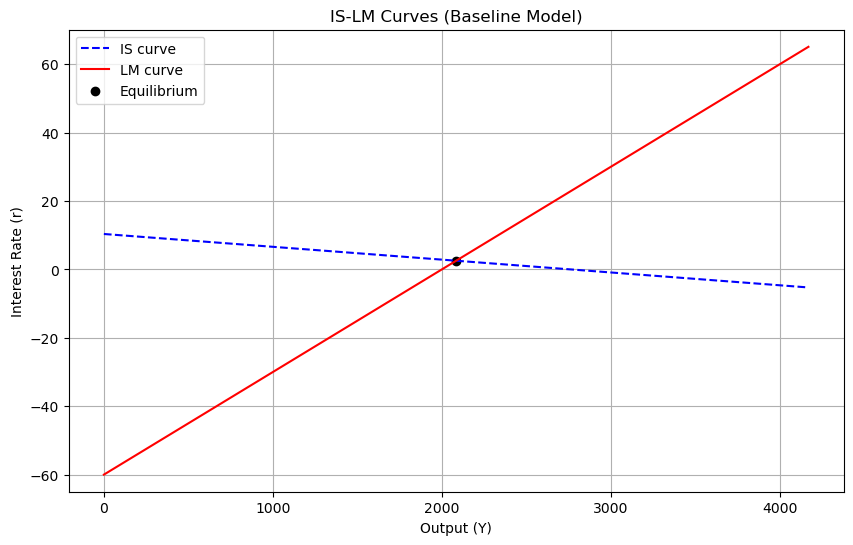

In [21]:
from modelproject import IS_LM_model_analytical
import matplotlib.pyplot as plt

# Create an instance of the analytical model
model_analytical = IS_LM_model_analytical()

# Derive IS-LM equations
model_analytical.derive_IS_LM_equations()

# Solve IS-LM analytically
model_analytical.solve_IS_LM_analytically()

# Plot IS-LM curves
model_analytical.plot_IS_LM_curves()

# Add title
plt.title('IS-LM Curves (Baseline Model)')

# Show the plot
plt.show()


**Policy scenarios**  
We now show the effects of different policy scenarios i.e.:
- Increase in government spending (G) from *400 to 500*.  
- Increase in price level (P) from *1 to 1.2*.  
- Increase in money supply (M) from *1200 to 1500*.

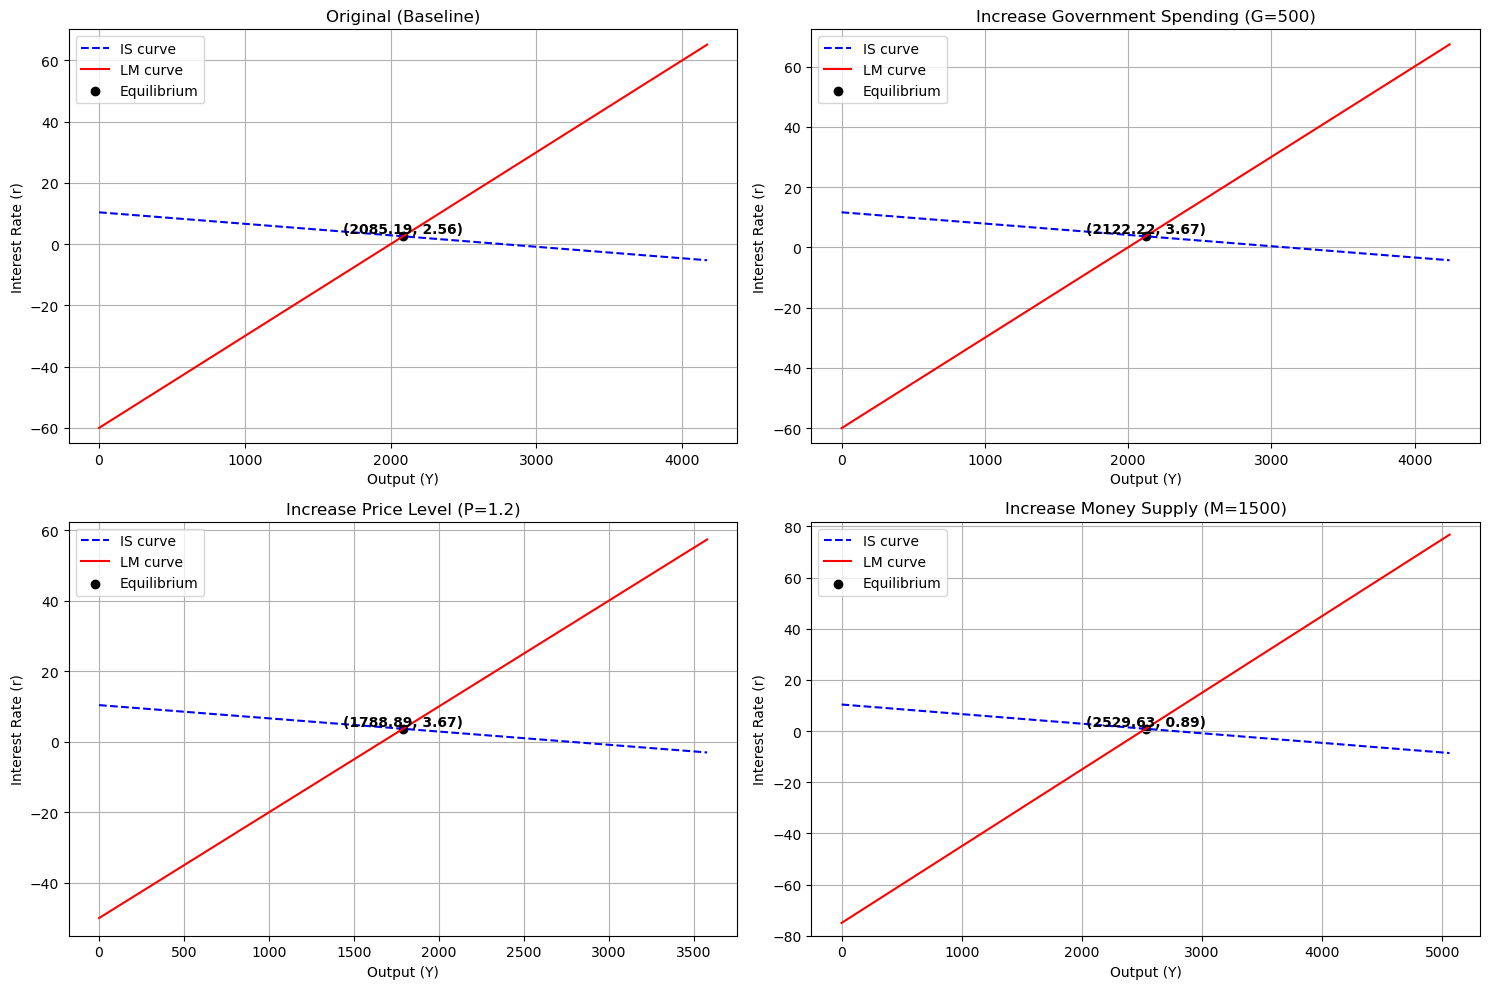

In [22]:
import matplotlib.pyplot as plt
from modelproject import IS_LM_model_analytical

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Original
model_analytical = IS_LM_model_analytical()
model_analytical.derive_IS_LM_equations()
model_analytical.solve_IS_LM_analytically()
model_analytical.plot_IS_LM_curves(ax=axs[0, 0])  # Use the second subplot
axs[0, 0].set_title('Original (Baseline)')
equilibrium_text = f'({model_analytical.sol.Y:.2f}, {model_analytical.sol.r:.2f})'
axs[0, 0].text(model_analytical.sol.Y, model_analytical.sol.r, equilibrium_text, ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Increase Government Spending
model_analytical = IS_LM_model_analytical(G=500)
model_analytical.derive_IS_LM_equations()
model_analytical.solve_IS_LM_analytically()
model_analytical.plot_IS_LM_curves(ax=axs[0, 1])  # Use the first subplot
axs[0, 1].set_title('Increase Government Spending (G=500)')
equilibrium_text = f'({model_analytical.sol.Y:.2f}, {model_analytical.sol.r:.2f})'
axs[0, 1].text(model_analytical.sol.Y, model_analytical.sol.r, equilibrium_text, ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Increase Price Level
model_analytical = IS_LM_model_analytical(P=1.2)
model_analytical.derive_IS_LM_equations()
model_analytical.solve_IS_LM_analytically()
model_analytical.plot_IS_LM_curves(ax=axs[1, 0])  # Use the third subplot
axs[1, 0].set_title('Increase Price Level (P=1.2)')
equilibrium_text = f'({model_analytical.sol.Y:.2f}, {model_analytical.sol.r:.2f})'
axs[1, 0].text(model_analytical.sol.Y, model_analytical.sol.r, equilibrium_text, ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Increase Money Supply
model_analytical = IS_LM_model_analytical(M=1500)
model_analytical.derive_IS_LM_equations()
model_analytical.solve_IS_LM_analytically()
model_analytical.plot_IS_LM_curves(ax=axs[1, 1])  # Use the fourth subplot
axs[1, 1].set_title('Increase Money Supply (M=1500)')
equilibrium_text = f'({model_analytical.sol.Y:.2f}, {model_analytical.sol.r:.2f})'
axs[1, 1].text(model_analytical.sol.Y, model_analytical.sol.r, equilibrium_text, ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Adjust spacing
plt.tight_layout()

# Show the plots
plt.show()


# Conclusion

Add concise conclusion. 